In [3]:
import numpy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from PIL import Image
from torch.utils.data.dataset import Dataset
from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

In [5]:
transf = transforms.Compose([transforms.Grayscale(),transforms.ToTensor()])
dataset = datasets.ImageFolder('PPC2/.',transf)
n = len(dataset)

ntrain = int(0.9 *n)
ntest = n - ntrain
train_data, test_data = torch.utils.data.random_split(dataset, [ntrain, ntest])
nbatch = 10
print (ntrain)
print (ntest)
print (n)

181
21
202


In [6]:
dataload_train = dict(shuffle=True, batch_size=nbatch,num_workers=0, pin_memory=True)
train_load = dataloader.DataLoader(train_data, **dataload_train)

dataload_test = dict(shuffle=True, batch_size=ntest,num_workers=0, pin_memory=True)
test_load = dataloader.DataLoader(test_data, **dataload_test)

In [7]:
# One hidden Layer NN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc0 = nn.Linear(32 * 32, 128*128)
        #self.fc1 = nn.Linear(64*64, 32*32)
        #self.fc2 = nn.Linear(32*32, 16*16)
        self.fcout = nn.Linear(128*128,3)
    def forward(self, x):
        out = self.fc0(x.view(-1,32*32))
        out = F.sigmoid(out)
        #out = F.tanh(self.fc1(out))
        #out = F.tanh(self.fc2(out))
        out = F.sigmoid(self.fcout(out))
        return F.log_softmax(out, dim=0)    
    
    
model = Model()
if cuda:
    model.cuda()
optimizer = optim.Adagrad(model.parameters())

EPOCHS = 20
losses = []


In [10]:
# Train the model
total_step = len(train_load)
for epoch in range(EPOCHS):
    for i, (images, labels) in enumerate(train_load):
        
        # Forward pass
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        losses.append(loss)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                .format(epoch+1, EPOCHS, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_load:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy of the model on the test images: {} %'.format(100 * correct / total))

Epoch [1/20], Step [1/19], Loss: 1.0986
Epoch [1/20], Step [2/19], Loss: 1.0986
Epoch [1/20], Step [3/19], Loss: 1.0986
Epoch [1/20], Step [4/19], Loss: 1.0986
Epoch [1/20], Step [5/19], Loss: 1.0986
Epoch [1/20], Step [6/19], Loss: 1.0986
Epoch [1/20], Step [7/19], Loss: 1.0986
Epoch [1/20], Step [8/19], Loss: 1.0986
Epoch [1/20], Step [9/19], Loss: 1.0986
Epoch [1/20], Step [10/19], Loss: 1.0986
Epoch [1/20], Step [11/19], Loss: 1.0986
Epoch [1/20], Step [12/19], Loss: 1.0986
Epoch [1/20], Step [13/19], Loss: 1.0986
Epoch [1/20], Step [14/19], Loss: 1.0986
Epoch [1/20], Step [15/19], Loss: 1.0986
Epoch [1/20], Step [16/19], Loss: 1.0986
Epoch [1/20], Step [17/19], Loss: 1.0986
Epoch [1/20], Step [18/19], Loss: 1.0986
Epoch [1/20], Step [19/19], Loss: 1.0986
Epoch [2/20], Step [1/19], Loss: 1.0986
Epoch [2/20], Step [2/19], Loss: 1.0986
Epoch [2/20], Step [3/19], Loss: 1.0986
Epoch [2/20], Step [4/19], Loss: 1.0986
Epoch [2/20], Step [5/19], Loss: 1.0986
Epoch [2/20], Step [6/19], Los

Epoch [11/20], Step [13/19], Loss: 1.0986
Epoch [11/20], Step [14/19], Loss: 1.0986
Epoch [11/20], Step [15/19], Loss: 1.0986
Epoch [11/20], Step [16/19], Loss: 1.0986
Epoch [11/20], Step [17/19], Loss: 1.0986
Epoch [11/20], Step [18/19], Loss: 1.0986
Epoch [11/20], Step [19/19], Loss: 1.0986
Epoch [12/20], Step [1/19], Loss: 1.0986
Epoch [12/20], Step [2/19], Loss: 1.0986
Epoch [12/20], Step [3/19], Loss: 1.0986
Epoch [12/20], Step [4/19], Loss: 1.0986
Epoch [12/20], Step [5/19], Loss: 1.0986
Epoch [12/20], Step [6/19], Loss: 1.0986
Epoch [12/20], Step [7/19], Loss: 1.0986
Epoch [12/20], Step [8/19], Loss: 1.0986
Epoch [12/20], Step [9/19], Loss: 1.0986
Epoch [12/20], Step [10/19], Loss: 1.0986
Epoch [12/20], Step [11/19], Loss: 1.0986
Epoch [12/20], Step [12/19], Loss: 1.0986
Epoch [12/20], Step [13/19], Loss: 1.0986
Epoch [12/20], Step [14/19], Loss: 1.0986
Epoch [12/20], Step [15/19], Loss: 1.0986
Epoch [12/20], Step [16/19], Loss: 1.0986
Epoch [12/20], Step [17/19], Loss: 1.0986
E

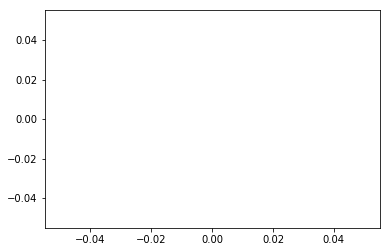

In [9]:
plt.plot(losses)